# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, normaltest, ttest_1samp, wilcoxon, ranksums, ttest_ind, norm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


### Is the distribution of body temperatures normal? 

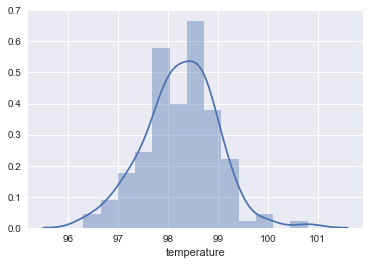

In [3]:
sns.set()
sns.distplot(df.temperature)
plt.show()

In [4]:
# Test if the population where the data from follows normal
def explain_test(pval,test):
    if pval > 0.05:
        print('The '+ test + ' indicates that the data is NOT normally distirbuted')
    else:
        print('The '+ test + ' indicates that the data IS normally distirbuted')

def norm_tests(xdata):
    _, p =kstest(xdata, 'norm')
    explain_test(p,'Kolmogorov-Smirnov test')
    print(40*'==')
    _, p =normaltest(xdata)
    explain_test(p,'D’Agostino and Pearson’s')

df_temp = df[['temperature']]
norm_tests(df_temp)

The Kolmogorov-Smirnov test indicates that the data IS normally distirbuted
The D’Agostino and Pearson’s indicates that the data is NOT normally distirbuted


In [5]:
#check gender effect
def by_gender(df):
    x = df.temperature
    females = x[(df.gender == 'F').values]
    males = x[(df.gender == 'M').values]
    return females, males

females, males = by_gender(df)

In [6]:
def check_gender_effect(females,males):
    print('FEMALE subjects')
    print(20*'--')
    norm_tests(females);
    print(20*' ')
    print('MALE subjects')
    print(20*' ')
    norm_tests(males);
    plt.hist(females);plt.hist(males);
    plt.legend(('Females','Males'))

check_gender_effect(females, males)

FEMALE subjects
----------------------------------------
The Kolmogorov-Smirnov test indicates that the data IS normally distirbuted
The D’Agostino and Pearson’s indicates that the data is NOT normally distirbuted
                    
MALE subjects
                    
The Kolmogorov-Smirnov test indicates that the data IS normally distirbuted
The D’Agostino and Pearson’s indicates that the data is NOT normally distirbuted


 True human body temperature follows normal distribution according to Kolmogorov-Smirnov test.

### Is the sample size large? Are the observations independent? 

There are 130 samples and it is large. If each observation is got randomly they would be independent.

### Is the true population mean really 98.6 degrees F? 
Would you use a one-sample or two-sample test? Why? 

In this situation, is it appropriate to use the t or z statistic? 

Now try using the other test. How is the result be different? Why? 


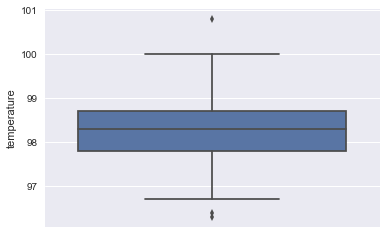

In [8]:
_ = sns.boxplot(y='temperature', data=df[['temperature']])
plt.show()

In [9]:
# one sample t test
def one_sample_test(xvector,mu):
    _, p_val = ttest_1samp(xvector,mu)
    print('The p-value for the t-statistic is: ' + str(p_val))
    if p_val < 0.05:
        print('We can reject the null hypothesis; The mean IS different than '+ str(mu))
    else:
        print('We cannot reject the null hypothesis; The mean is NOT different than '+ str(mu))

one_sample_test(df_temp, 98.6)

The p-value for the t-statistic is: [  2.41063204e-07]
We can reject the null hypothesis; The mean IS different than 98.6


In [10]:
# one sample z test
def OneSampZ(X1, delta, n1):
    from numpy import sqrt, abs, round
    sd = np.std(x1)
    SE = sqrt(sd**2/n1)
    mean = np.mean(x1)
    z = (mean - delta)/SE
    P_value = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(P_value, 4)

x1 = df['temperature']
OneSampZ(x1,98.6,130)

(-5.476, 0.0)

In [11]:
x = df['temperature']
y = [98.6] * 130
wilcoxon(x, y)

WilcoxonResult(statistic=1774.5, pvalue=1.1661000053543139e-06)

True population mean is not 98.6 for one sample t test p value less than 0.05. We don't know population variance so we choose t test instead of z test. 

However if the sample size is large enough we can use sample variance instead of population variance. We used Z test for this sample and got the same conclusion as t test.

If we choose unparametric wilcoxon signed rank test , we still get the population median temperature is different from 98.6 for p value less than 0.05.

### Draw a small sample of size 10 from the data and repeat both tests. 
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the t and z statistic? 

In [12]:
# 10 of the data without replacement
data = df.sample(frac=1/13, replace=False, random_state=123) 

In [13]:
one_sample_test(data[['temperature']], 98.6)

The p-value for the t-statistic is: [ 0.01736665]
We can reject the null hypothesis; The mean IS different than 98.6


In [14]:
OneSampZ(data['temperature'], 98.6, 10)

(-1.5189999999999999, 0.1288)

 When sample size is small I choose one sample t test for population variance can not be replaced by sample variance in this situation.

### At what temperature should we consider someone's temperature to be "abnormal"? 
Start by computing the margin of error and confidence interval. 

In [15]:
# 95% confidence interval of normal temperature
def expected_rante(observations):
    SE = np.std(observations) / np.sqrt(len(observations))
    lb = np.mean(observations) - 1.96*SE
    ub = np.mean(observations) + 1.96*SE
    print('The lower limit at the 95% conf. level is ' + str(lb))
    print('The upper limit at the 95% conf. level is ' + str(ub))
    print(10*'--')
    return lb, ub
expected_rante(df_temp)

The lower limit at the 95% conf. level is temperature    98.12368
dtype: float64
The upper limit at the 95% conf. level is temperature    98.374782
dtype: float64
--------------------


(temperature    98.12368
 dtype: float64, temperature    98.374782
 dtype: float64)

 The temperature is lower than 98.12368 or above 98.374782 to be considered 'abnormal'

### Is there a significant difference between males and females in normal temperature? 
What test did you use and why? 
Write a story with your conclusion in the context of the original problem. 

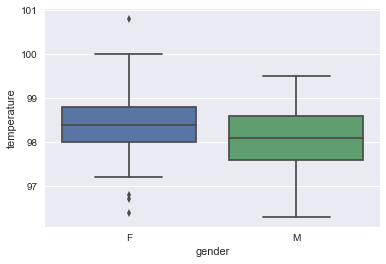

In [16]:
_ = sns.boxplot(x='gender', y='temperature', data=df)
plt.show()

In [17]:
def men_vs_women(fem,mal):
    _, p = ttest_ind(fem,mal,equal_var=False)
    print('The p-value for the t-statistic is: ' + str(p))
    if p < 0.05:
        print('We can reject the null hypothesis; The means ARE different')
    else:
        print('We cannot reject the null hypothesis; The means ARE NOT different') 
men_vs_women(females, males)

The p-value for the t-statistic is: 0.0239382641829
We can reject the null hypothesis; The means ARE different


Two sample t test is choosed for we are test if two samples means are from the same population and we don't know the population variance. 

There is significant difference between males and females in normal temperature. Female's meab normal temperature is higher than that of male's.